In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
# Loading data
customers = pd.read_csv(r"C:\Users\VIVINA MUTH\Desktop\Customers.csv")
transactions = pd.read_csv(r"C:\Users\VIVINA MUTH\Desktop\trending_products.csv")

In [28]:
# Preprocess customer data
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['DaysSinceSignup'] = (pd.Timestamp.now() - customers['SignupDate']).dt.days

In [29]:
# Encode 'Region' using one-hot encoding
customer_region_encoded = pd.get_dummies(customers['Region'], drop_first=True)

In [30]:
# Combine customer features
customer_features = pd.concat([customers[['DaysSinceSignup']], customer_region_encoded], axis=1)


In [40]:
def perform_clustering(data, n_clusters):
    """
    Performs KMeans clustering and returns the cluster labels and DB Index.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    db_index = davies_bouldin_score(data, labels)
    return labels, db_index

In [45]:
# Test clustering for different cluster numbers
n_clusters_range = range(2, 11)
customer_db_indices = []
transaction_db_indices = []

for n_clusters in n_clusters_range:
    _, db_index_customers = perform_clustering(customer_features, n_clusters)
    _, db_index_transactions = perform_clustering(transactions, n_clusters)
    customer_db_indices.append(db_index_customers)
    transaction_db_indices.append(db_index_transactions)

C:\Users\VIVINA MUTH\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [48]:
# Find optimal cluster number based on DB Index
optimal_clusters_customers = n_clusters_range[np.argmin(customer_db_indices)]
optimal_clusters_transactions = n_clusters_range[np.argmin(transaction_db_indices)]

print(f"Optimal clusters for customers: {optimal_clusters_customers}")
print(f"Optimal clusters for transactions: {optimal_clusters_transactions}")


Optimal clusters for customers: 2
Optimal clusters for transactions: 9


In [51]:
# Final clustering
customer_labels, _ = perform_clustering(customer_features, optimal_clusters_customers)
transaction_labels, _ = perform_clustering(transactions, optimal_clusters_transactions)


In [53]:
# PCA for visualization
def plot_clusters(data, labels, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set2', s=60)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

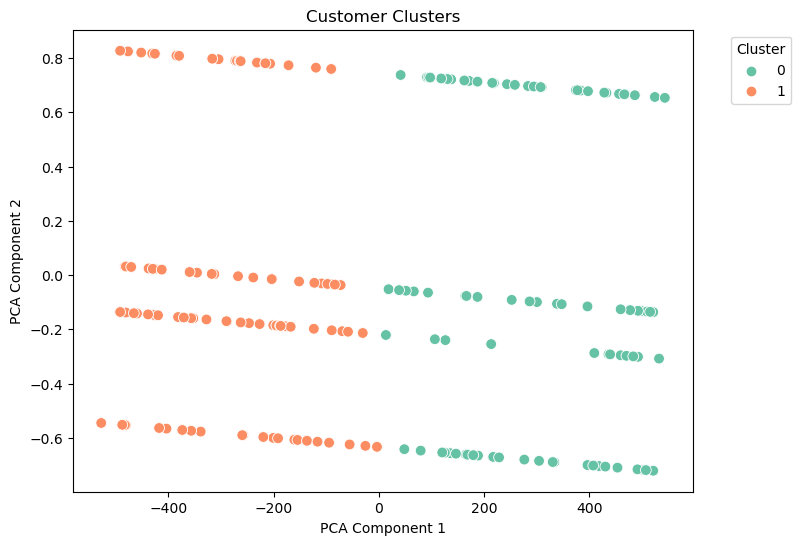

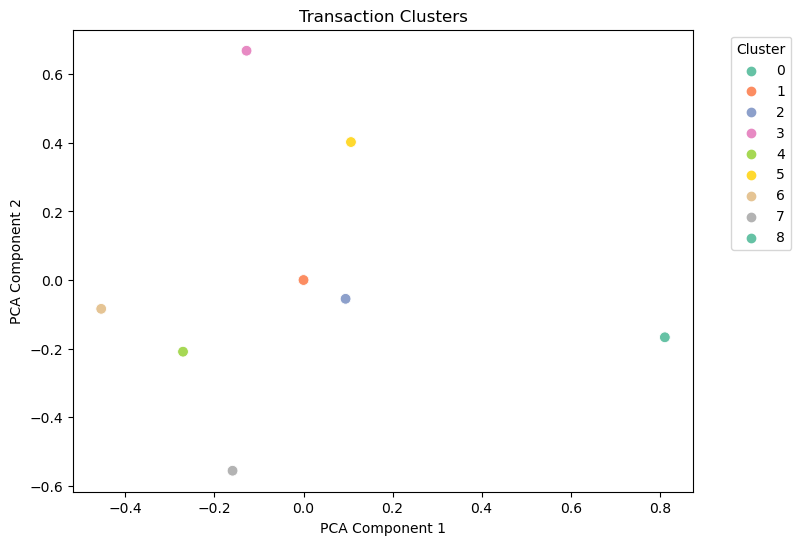

In [58]:
# Visualize customer clusters
plot_clusters(customer_features, customer_labels, "Customer Clusters")

# Visualize transaction clusters
plot_clusters(transactions, transaction_labels, "Transaction Clusters")

In [59]:
print(f"Customer DB Index: {min(customer_db_indices)} (Optimal clusters: {optimal_clusters_customers})")
print(f"Transaction DB Index: {min(transaction_db_indices)} (Optimal clusters: {optimal_clusters_transactions})")

Customer DB Index: 0.4487299521417854 (Optimal clusters: 2)
Transaction DB Index: 0.0 (Optimal clusters: 9)


In [79]:
with open("Clustering.pdf", "w") as f:
    for insight in insights:
        f.write(insight + "\n")

print("\n Insights saved to Clustering.txt")


 Insights saved to Clustering.txt


In [77]:
insights = ["""

Customer Segmentation:  
   Customers were grouped into clusters based on their region and signup date. This revealed distinct segments like new customers who can be engaged with welcome offers and loyal customers who can be rewarded with special programs to improve retention.

Product Performance:  
   Products were categorized into groups based on ratings and reviews. Popular, highly rated products were identified for promotion, while poorly-rated products were flagged for improvement in quality or visibility.

Targeted Marketing:  
   By linking customer and product clusters, businesses can personalize their approach for example, recommending new products to recently signed-up customers or offering high rated products to loyal ones.

Region-Based Growth:  
   Analysis of customer data highlighted regions with potential for growth, enabling businesses to focus marketing efforts and investments in areas with lower sales activity.

Improved Decision-Making:  
   The clustering analysis provided clear and actionable insights, supported by visualizations, helping businesses tailor their strategies to enhance customer satisfaction, boost product performance, and drive overall revenue growth."""]
with open("Clustering.pdf", "w") as f:  
    for insight in insights:  
        f.write(insight + "\n")  

print("\n Insights saved to Clustering.txt")


 Insights saved to Clustering.txt


In [81]:
customers.to_csv('Vivina_Muthamma_Clustering.csv', index=False)
print("Enriched dataset saved to 'Vivina_Muthamma_Clustering.csv'")

Enriched dataset saved to 'Vivina_Muthamma_Clustering.csv'
